In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import sklearn.svm as svm
import numpy as np

import cv2
import glob
import time
import pickle

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.model_selection import train_test_split

from sklearn.utils import shuffle
from sklearn.externals import joblib
from udacity_lesson_functions import *
from udacity_search_classify import *

/home/sdr/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


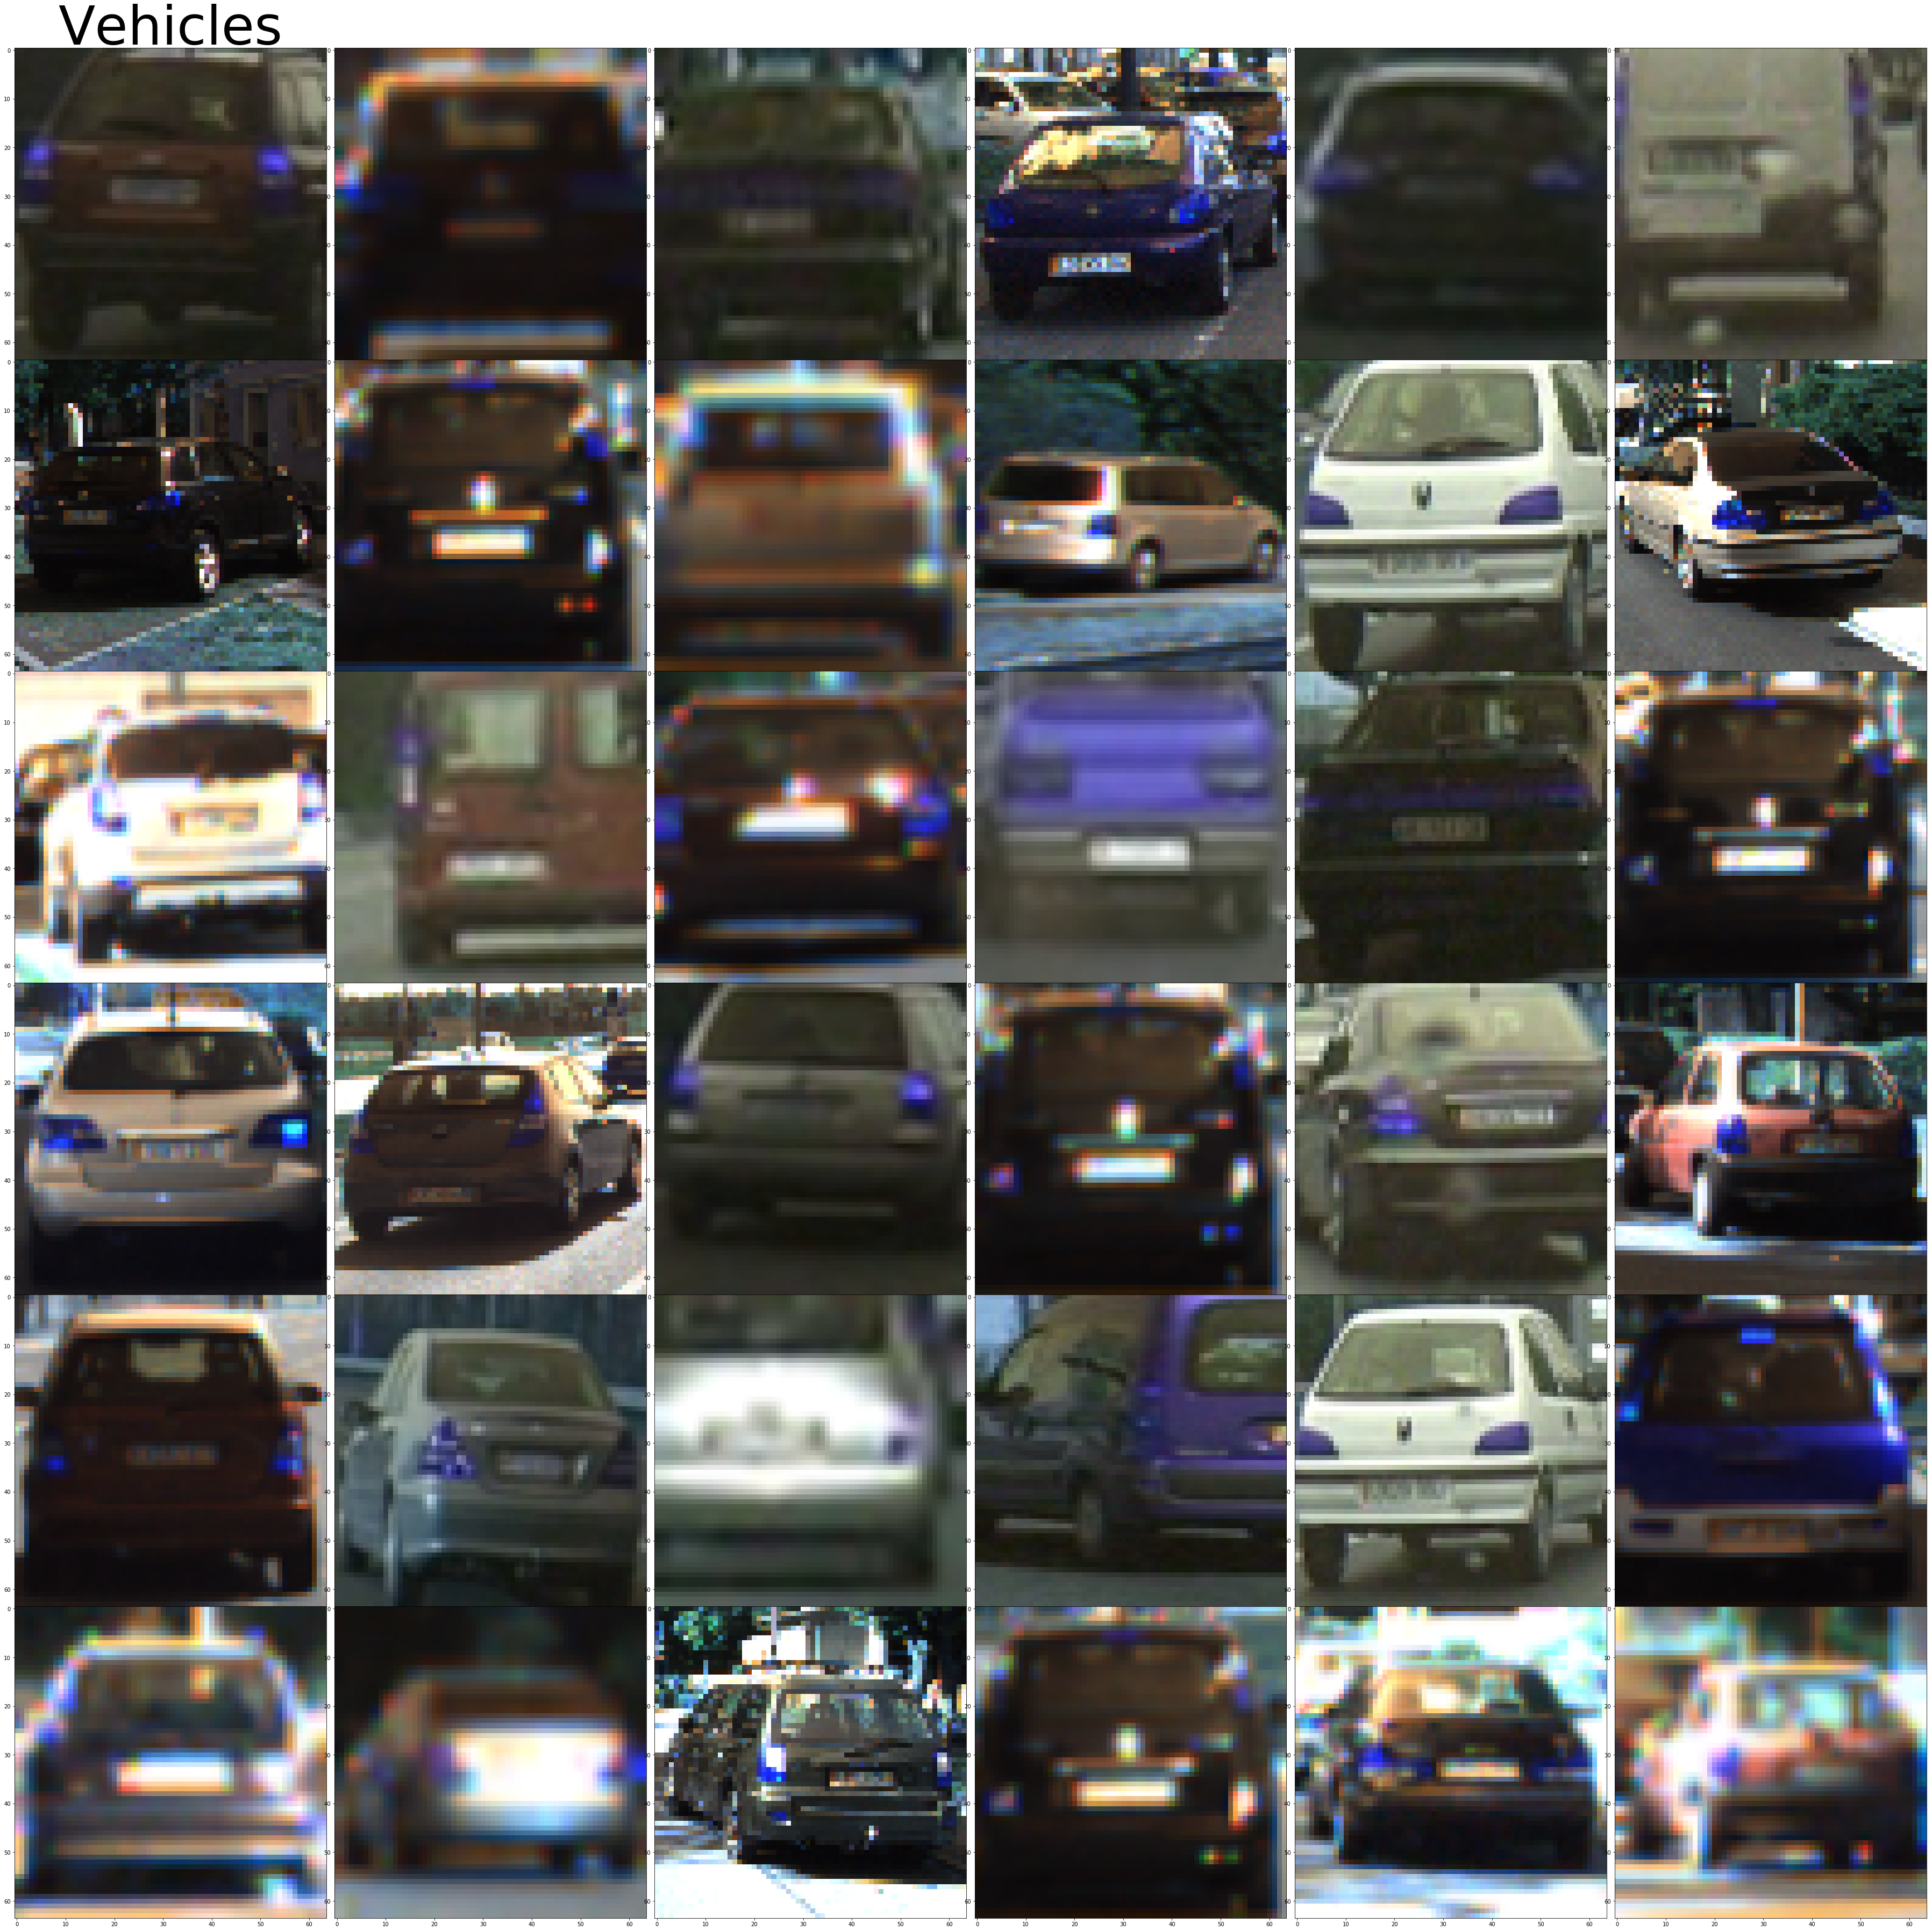

In [3]:
vehicle_n_nonvehicle = glob.glob('train/*/*/*.png')
vehicles = []
non_vehicles = []
all_vehicles =[]
all_non_vehicles = []

for v_and_nv in vehicle_n_nonvehicle:
    if 'non-vehicle' in v_and_nv:
        all_non_vehicles.append(v_and_nv)
    else:
        all_vehicles.append(v_and_nv)
        
for i, non_vehicle in enumerate(all_non_vehicles):
    non_vehicles.append(non_vehicle)
        
for j, vehicle in enumerate(all_vehicles):
    vehicles.append(vehicle)
        
vehicle_len = len(vehicles)
non_vehicle_len = len(non_vehicles)

ran_idx = []
vehicle_img = []
non_vehicle_img = []

for k in range(36):
    ran_idx.append(np.random.randint(0, vehicle_len))
    vehicle_img.append(vehicles[ran_idx[k]])

fig = plt.figure(figsize=(64, 64))
w_ratio = [1 for n in range(6)]
h_ratio = [1 for n in range(6)]
grid = gridspec.GridSpec(6, 6, wspace=0.0, hspace=0.0, width_ratios=w_ratio, height_ratios=h_ratio)

for idx, img in enumerate(vehicle_img):
    vimg = cv2.imread(img)
    ax = plt.Subplot(fig, grid[idx])
    ax.imshow(vimg)
    if idx == 0:
        ax.set_title('Vehicles', fontsize = 100)
    fig.add_subplot(ax)

plt.show()

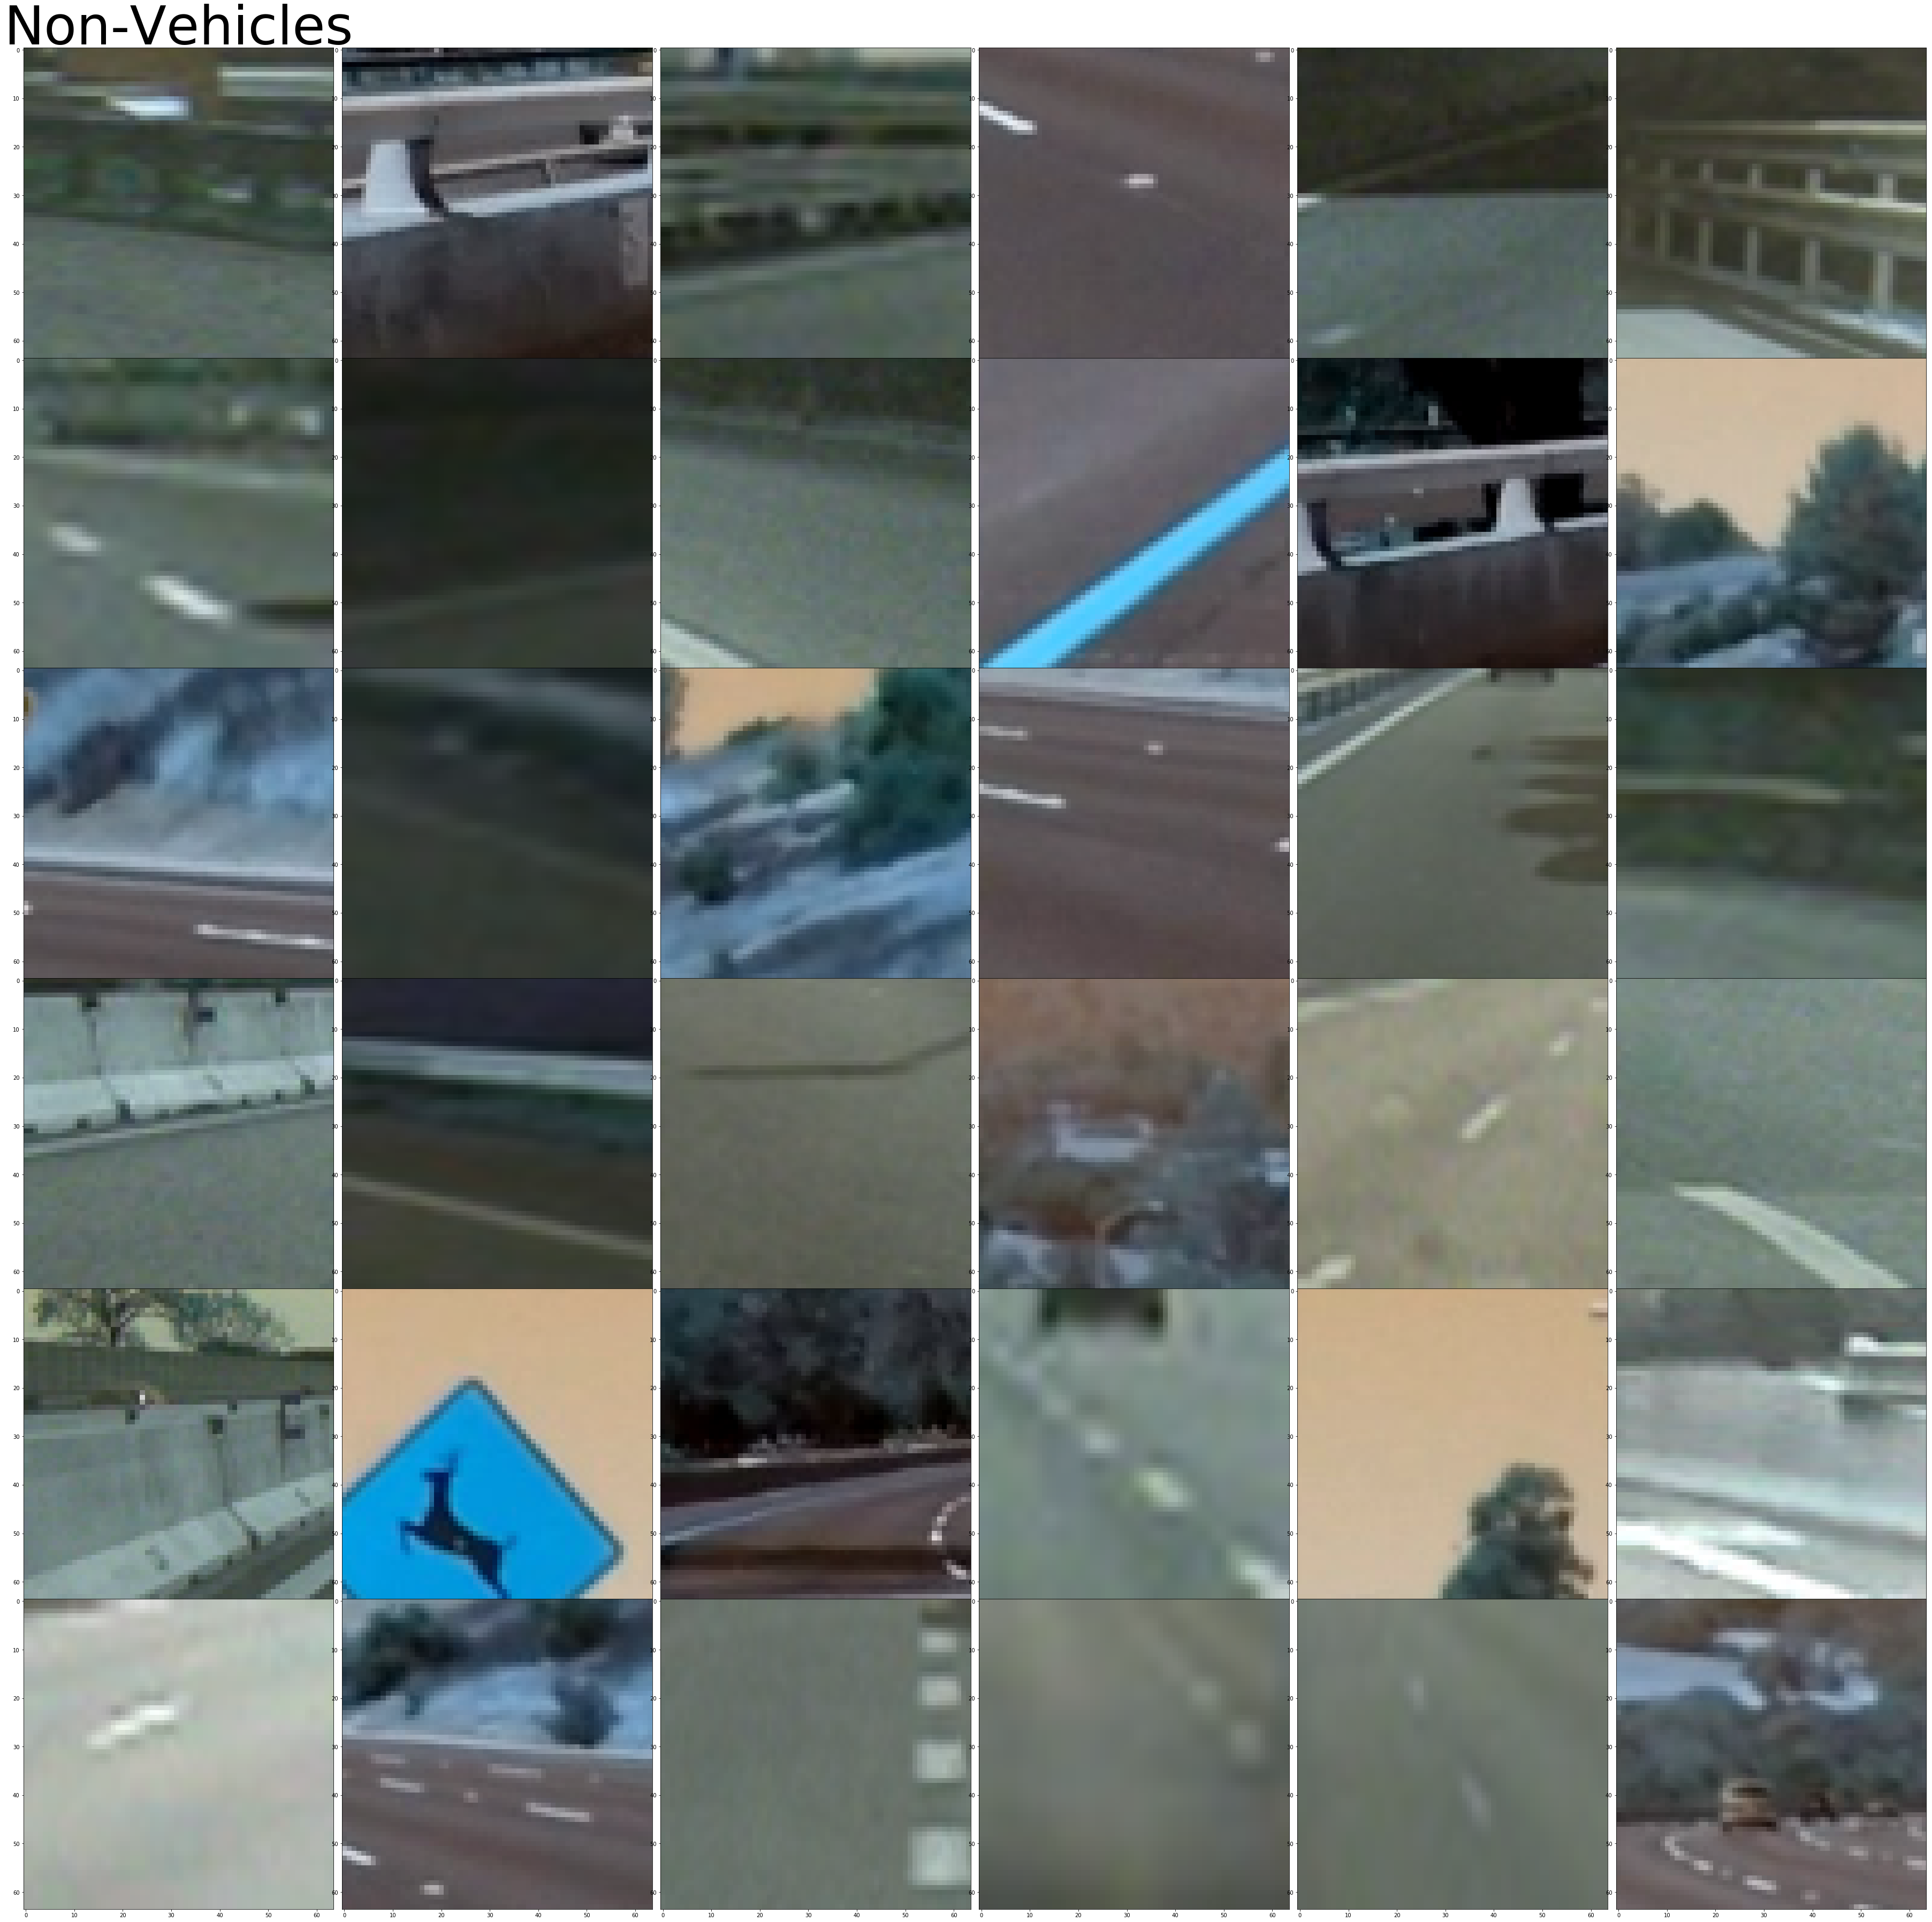

In [4]:
vehicle_n_nonvehicle = glob.glob('train/*/*/*.png')
non_vehicles = []
all_non_vehicles = []

for v_and_nv in vehicle_n_nonvehicle:
    if 'non-vehicle' in v_and_nv:
        all_non_vehicles.append(v_and_nv)
        
for i, non_vehicle in enumerate(all_non_vehicles):
    non_vehicles.append(non_vehicle)
        
non_vehicle_len = len(non_vehicles)

ran_idx = []
non_vehicle_img = []

for k in range(36):
    ran_idx.append(np.random.randint(0, non_vehicle_len))
    non_vehicle_img.append(non_vehicles[ran_idx[k]])

fig = plt.figure(figsize=(64, 64))
w_ratio = [1 for n in range(6)]
h_ratio = [1 for n in range(6)]
grid = gridspec.GridSpec(6, 6, wspace=0.0, hspace=0.0, width_ratios=w_ratio, height_ratios=h_ratio)

for idx, img in enumerate(non_vehicle_img):
    nvimg = cv2.imread(img)
    ax = plt.Subplot(fig, grid[idx])
    ax.imshow(nvimg)
    if idx == 0:
        ax.set_title('Non-Vehicles', fontsize = 100)
    fig.add_subplot(ax)

plt.show()

In [5]:
vehicle_n_nonvehicle = glob.glob('train/*/*/*.png')
vehicles = []
non_vehicles = []
all_vehicles =[]
all_non_vehicles = []

for v_and_nv in vehicle_n_nonvehicle:
    if 'non-vehicle' in v_and_nv:
        all_non_vehicles.append(v_and_nv)
    else:
        all_vehicles.append(v_and_nv)
        
for i, non_vehicle in enumerate(all_non_vehicles):
    non_vehicles.append(non_vehicle)
        
for j, vehicle in enumerate(all_vehicles):
    vehicles.append(vehicle)
        
vehicle_len = len(vehicles)
non_vehicle_len = len(non_vehicles)

train = 0.7
valid = 0.2
tests = 0.1

mini = (train * np.array([vehicle_len, non_vehicle_len])).astype('int')
maxi = ((train + valid) * np.array([vehicle_len, non_vehicle_len])).astype('int')

print(mini)
print(maxi)

vehicle_train = vehicles[:mini[0]]
vehicle_valid = vehicles[mini[0]:maxi[0]]
vehicle_tests = vehicles[maxi[0]:]

non_vehicle_train = non_vehicles[:mini[1]]
non_vehicle_valid = non_vehicles[mini[1]:maxi[1]]
non_vehicle_tests = non_vehicles[maxi[1]:]

#vehicle_train = int(vehicle_len * train)
#vehicle_valid = int(vehicle_len * valid)
#vehicle_tests = int(vehicle_len * tests)

#non_vehicle_train = int(non_vehicle_len * train)
#non_vehicle_valid = int(non_vehicle_len * valid)
#non_vehicle_tests = int(non_vehicle_len * tests)

print('Number of samples in Vehicle Training: ', len(vehicle_train))
print('Number of samples in Vehicle Validation: ', len(vehicle_valid))
print('Number of samples in Vehicle Test: ', len(vehicle_tests))

print('Number of samples in Non-Vehicle Training: ', len(non_vehicle_train))
print('Number of samples in Non-Vehicle Validation: ', len(non_vehicle_valid))
print('Number of samples in Non-Vehicle Test: ', len(non_vehicle_tests))

[6154 6277]
[7912 8071]
Number of samples in Vehicle Training:  6154
Number of samples in Vehicle Validation:  1758
Number of samples in Vehicle Test:  880
Number of samples in Non-Vehicle Training:  6277
Number of samples in Non-Vehicle Validation:  1794
Number of samples in Non-Vehicle Test:  897


In [8]:
vehicle_true_false_file = 'vehicle_true_false_data.p'
print('Saving Vehicle true false data to pickle file')
try:
    with open(vehicle_true_false_file, 'wb') as pfile:
        pickle.dump(
            {
                'vehicle_train': vehicle_train,
                'vehicle_valid': vehicle_valid,
                'vehicle_tests': vehicle_tests,
                'non_vehicle_train': non_vehicle_train,
                'non_vehicle_valid': non_vehicle_valid,
                'non_vehicle_tests': non_vehicle_tests
            },
            pfile, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save Vehicle true false data to', pickle_file, ':', e)
    raise

print('Vehicle true false data saved in pickle file.')

Saving Vehicle true false data to pickle file
Vehicle true false data saved in pickle file.


Check Vehicle True False Data:
train/vehicles/KITTI_extracted/1564.png
train/non-vehicles/GTI/image2840.png


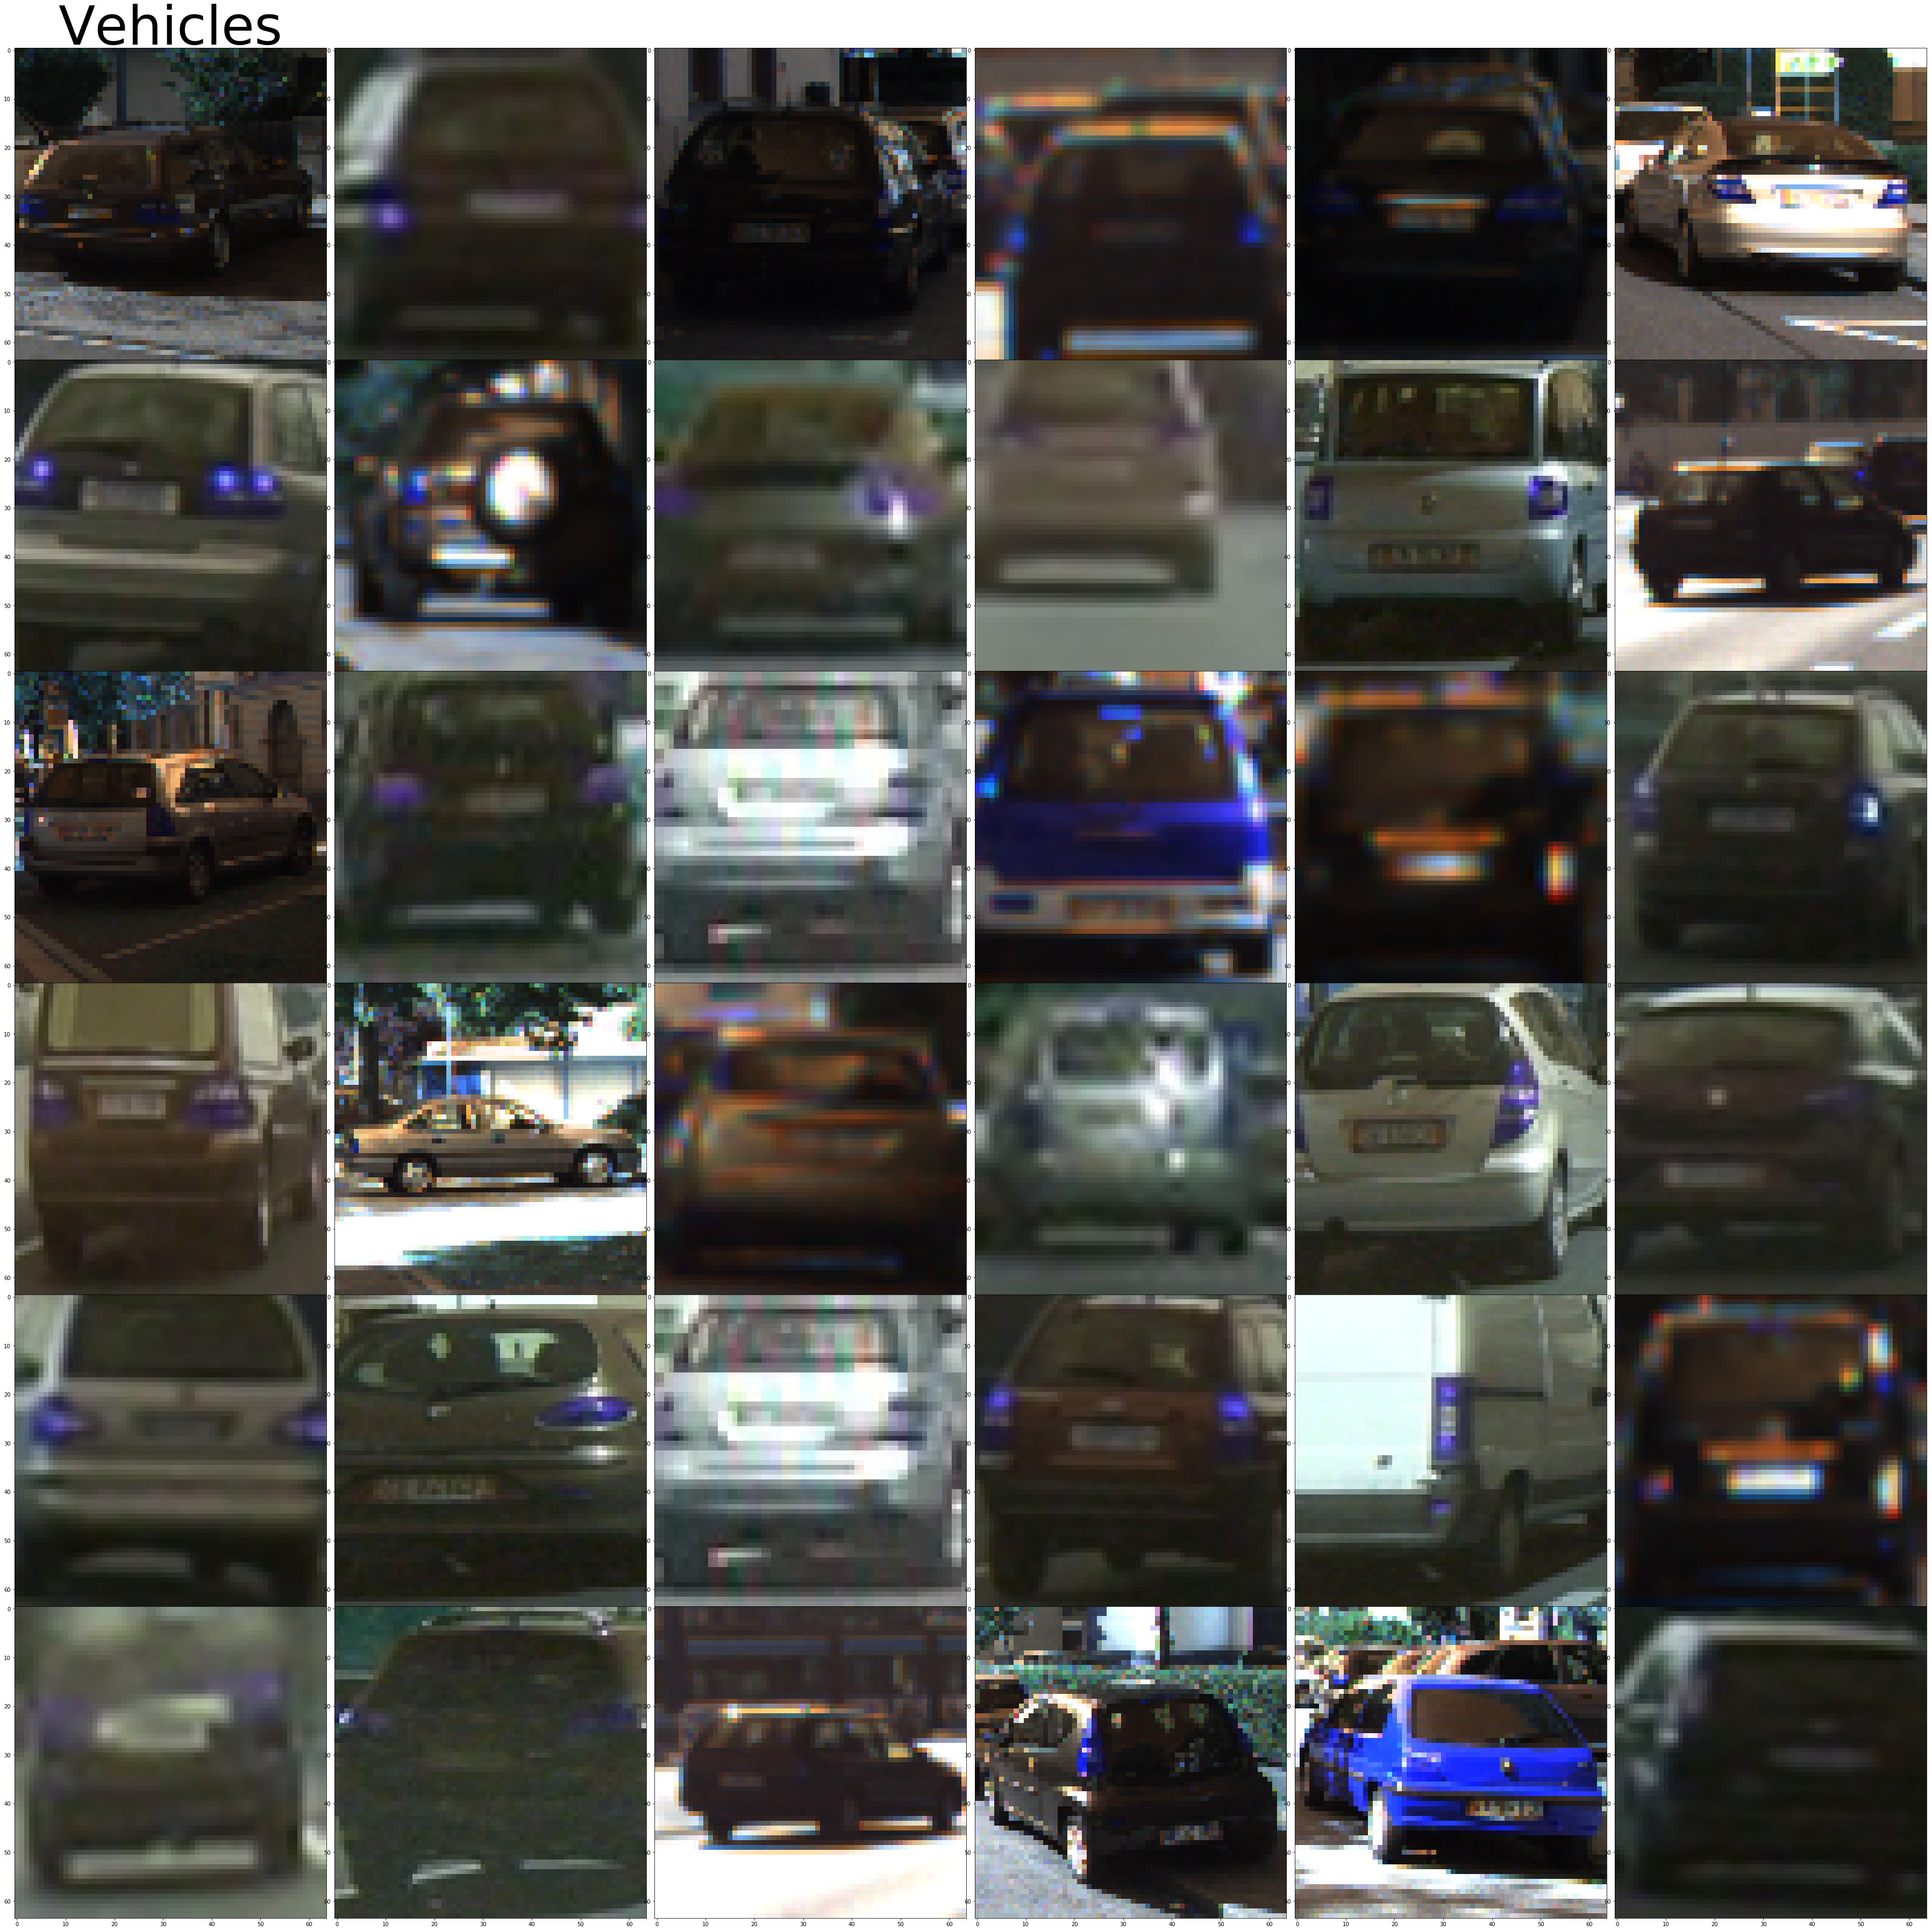

In [9]:
vehicle_true_false_file = 'vehicle_true_false_data.p'
with open(vehicle_true_false_file, mode='rb') as f:
    data = pickle.load(f)
vehicle_train = data['vehicle_train']
vehicle_valid = data['vehicle_valid']
vehicle_tests = data['vehicle_tests']
non_vehicle_train = data['non_vehicle_train']
non_vehicle_valid = data['non_vehicle_valid']
non_vehicle_tests = data['non_vehicle_tests']

ran_idx = []
vehicle_img = []
non_vehicle_img = []

for k in range(36):
    ran_idx.append(np.random.randint(0, 3333))
    vehicle_img.append(vehicle_train[ran_idx[k]])
    non_vehicle_img.append(non_vehicle_train[ran_idx[k]])
    
fig = plt.figure(figsize=(64, 64))
w_ratio = [1 for n in range(6)]
h_ratio = [1 for n in range(6)]
grid = gridspec.GridSpec(6, 6, wspace=0.0, hspace=0.0, width_ratios=w_ratio, height_ratios=h_ratio)

for idx, img in enumerate(vehicle_img):
    vimg = cv2.imread(img)
    ax = plt.Subplot(fig, grid[idx])
    ax.imshow(vimg)
    if idx == 0:
        ax.set_title('Vehicles', fontsize = 100)
    fig.add_subplot(ax)

#vehicle = plt.imread(vehicle_train[pick_one])
#non_vehicle = plt.imread(non_vehicle_train[pick_one])
pick_one = np.random.randint(0, 3333)
print('Check Vehicle True False Data:')
print(vehicle_train[pick_one])
print(non_vehicle_train[pick_one])

#plt.imshow(vehicle)
plt.show()

Check Vehicle True False Data:
train/vehicles/GTI_Far/image0721.png
train/non-vehicles/GTI/image2986.png


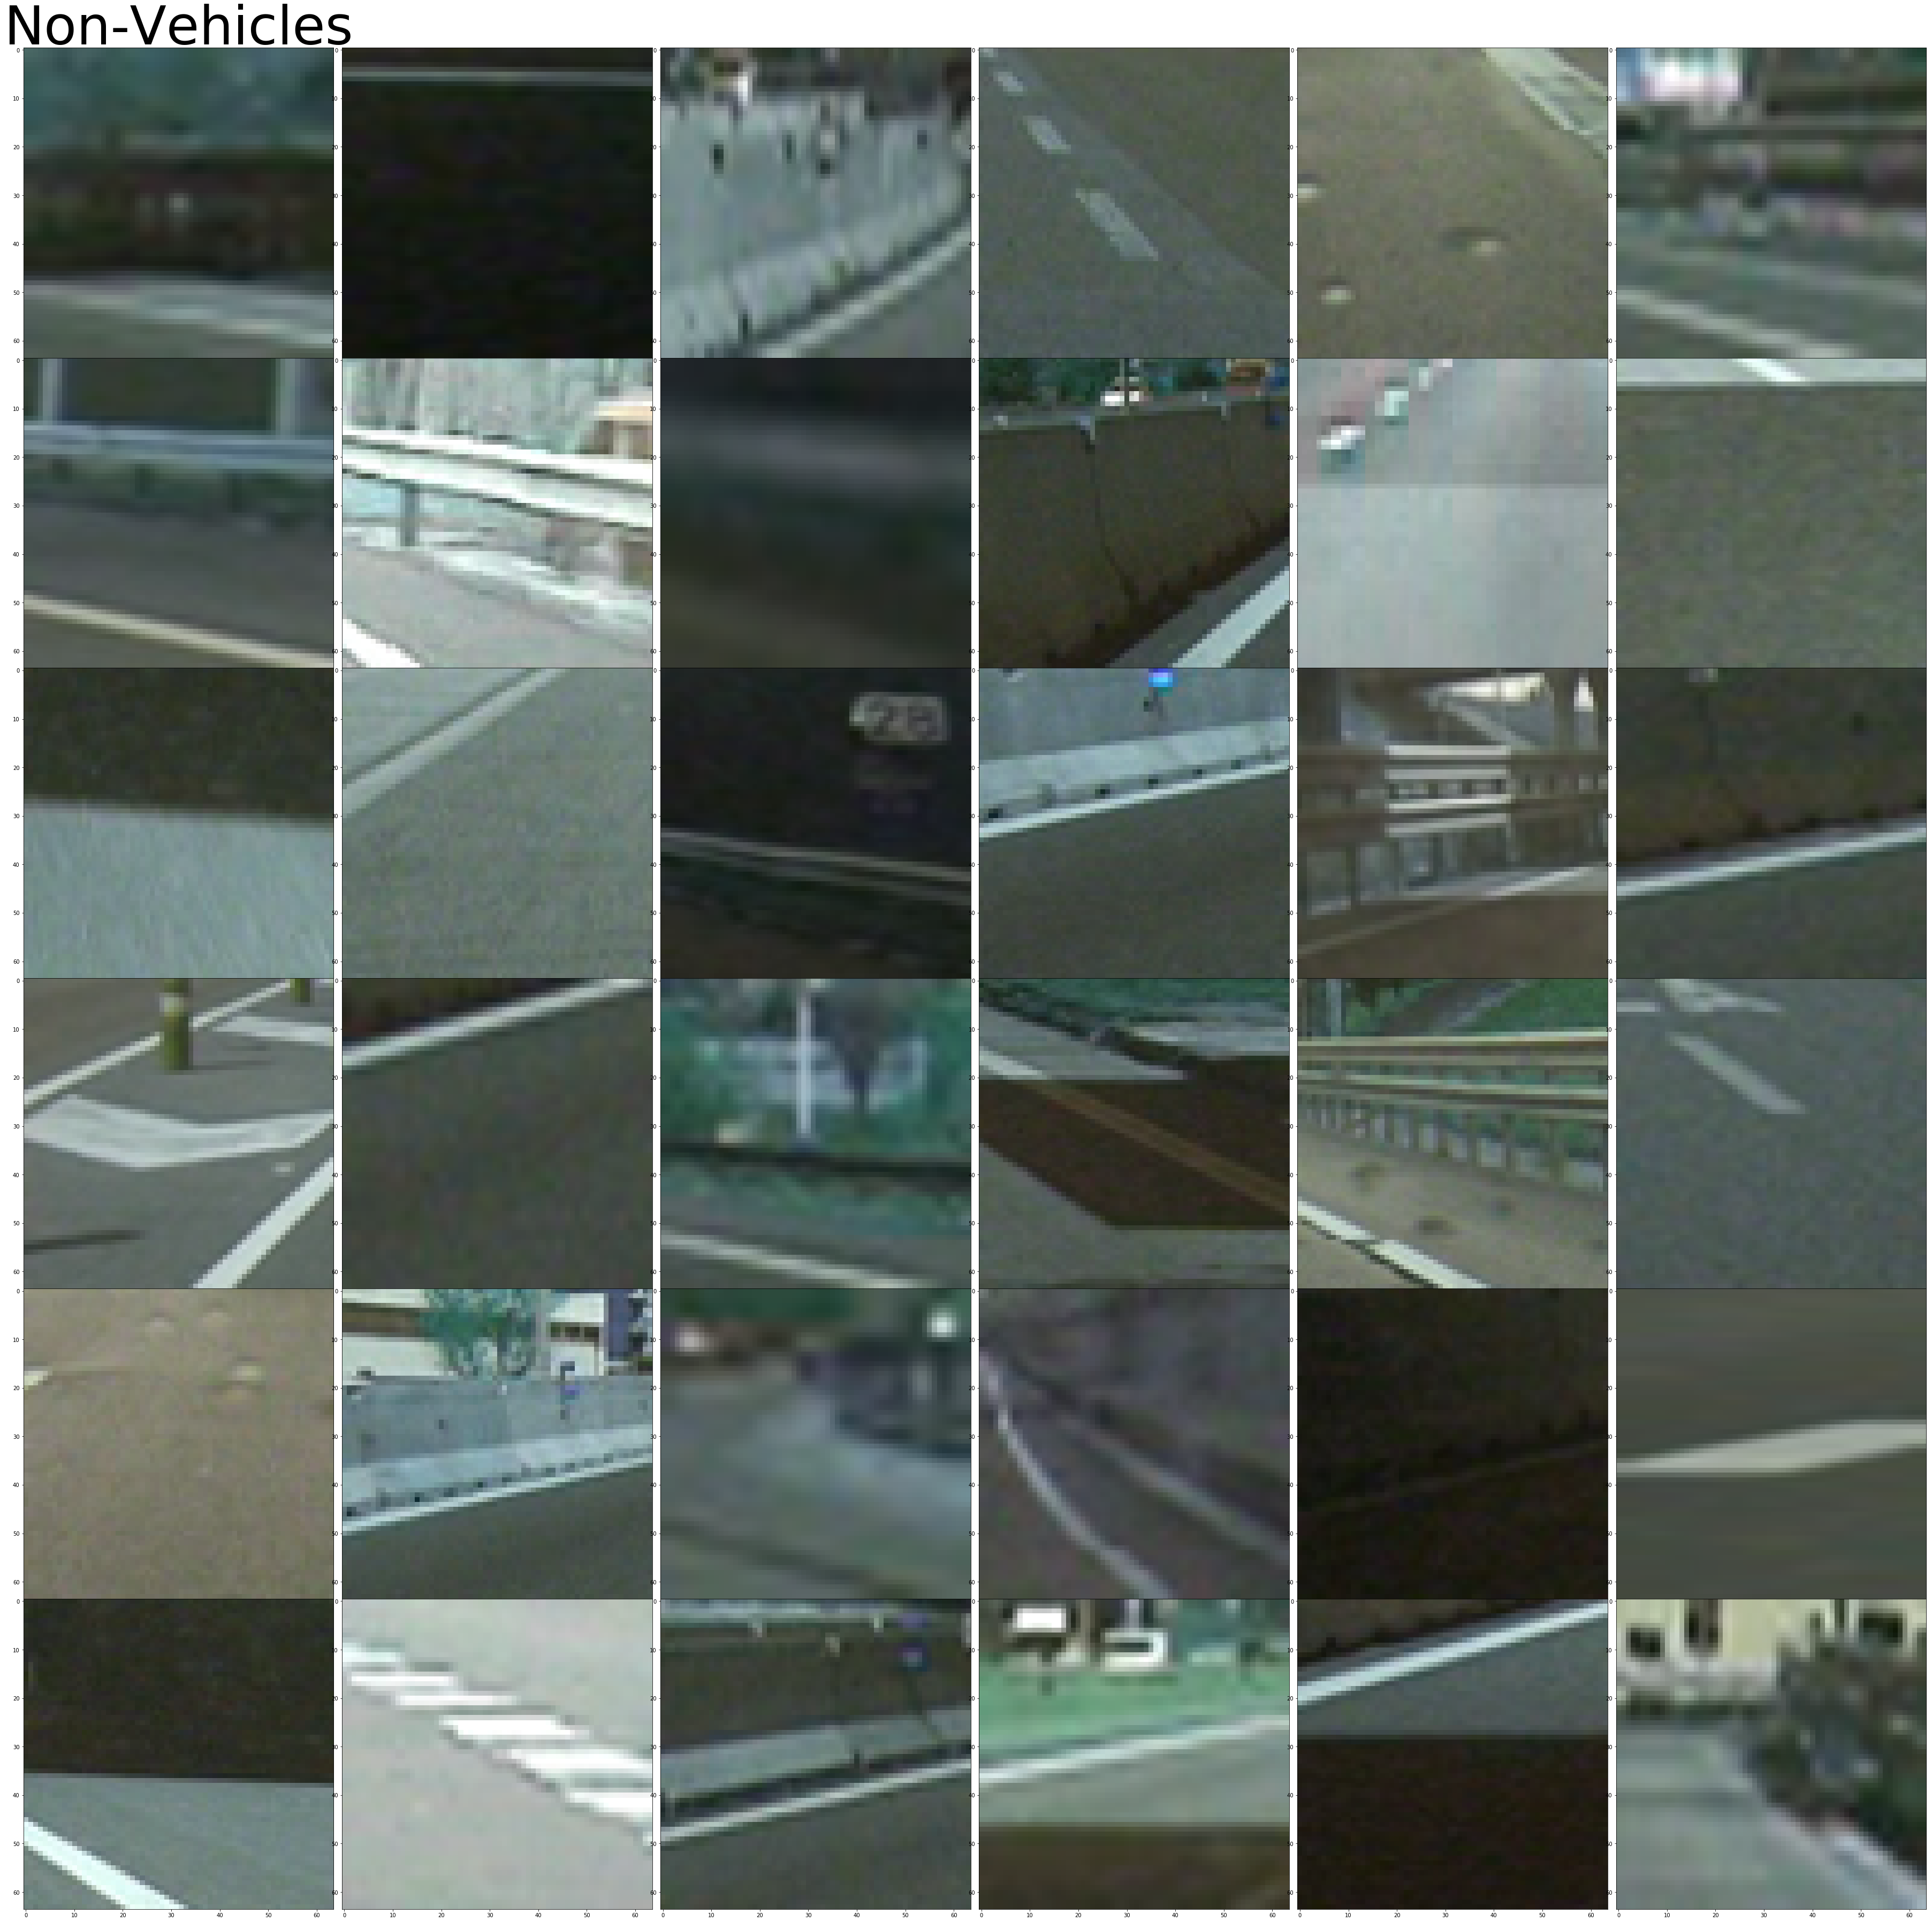

In [10]:
vehicle_true_false_file = 'vehicle_true_false_data.p'
with open(vehicle_true_false_file, mode='rb') as f:
    data = pickle.load(f)
vehicle_train = data['vehicle_train']
vehicle_valid = data['vehicle_valid']
vehicle_tests = data['vehicle_tests']
non_vehicle_train = data['non_vehicle_train']
non_vehicle_valid = data['non_vehicle_valid']
non_vehicle_tests = data['non_vehicle_tests']

ran_idx = []
vehicle_img = []
non_vehicle_img = []

for k in range(36):
    ran_idx.append(np.random.randint(0, 3333))
    vehicle_img.append(vehicle_train[ran_idx[k]])
    non_vehicle_img.append(non_vehicle_train[ran_idx[k]])
    
fig = plt.figure(figsize=(64, 64))
w_ratio = [1 for n in range(6)]
h_ratio = [1 for n in range(6)]
grid = gridspec.GridSpec(6, 6, wspace=0.0, hspace=0.0, width_ratios=w_ratio, height_ratios=h_ratio)

for idx, img in enumerate(non_vehicle_img):
    nvimg = cv2.imread(img)
    ax = plt.Subplot(fig, grid[idx])
    ax.imshow(nvimg)
    if idx == 0:
        ax.set_title('Non-Vehicles', fontsize = 100)
    fig.add_subplot(ax)

#vehicle = plt.imread(vehicle_train[pick_one])
#non_vehicle = plt.imread(non_vehicle_train[pick_one])
pick_one = np.random.randint(0, 3333)
print('Check Vehicle True False Data:')
print(vehicle_train[pick_one])
print(non_vehicle_train[pick_one])

#plt.imshow(vehicle)
plt.show()

In [11]:
vehicle_true_false_file = 'vehicle_true_false_data.p'
with open(vehicle_true_false_file, mode='rb') as f:
    data = pickle.load(f)
vehicle_train = data['vehicle_train']
vehicle_valid = data['vehicle_valid']
vehicle_tests = data['vehicle_tests']
non_vehicle_train = data['non_vehicle_train']
non_vehicle_valid = data['non_vehicle_valid']
non_vehicle_tests = data['non_vehicle_tests']

def collect_features(files, color_space='RGB', spatial_size=(32, 32),
                 hist_bins=32, orient=9, pix_per_cell=8, 
                 cell_per_block=2, hog_channel=0,
                 spatial_feat=True, hist_feat=True, hog_feat=True):
    features = []
    for file in files:  
        img = mpimg.imread(file)
        img_features = single_img_features(img, color_space=color_space, 
                                           spatial_size=spatial_size, 
                                           hist_bins=hist_bins, orient=orient, 
                                           pix_per_cell=pix_per_cell, 
                                           cell_per_block=cell_per_block, 
                                           hog_channel=hog_channel, 
                                           spatial_feat=spatial_feat, 
                                           hist_feat=hist_feat, 
                                           hog_feat=hog_feat)
        
        features.append(img_features)
        
    return features

In [13]:
### This code is based on Udacity Lecture 34(Search and Classify)
color_space = 'HLS' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
spatial_size = (16, 16)
hist_bins = 32
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL'
spatial_feat = True
hist_feat = True
hog_feat = True

t = time.time()
vehicle_train_feat = collect_features(vehicle_train, color_space, spatial_size, 
                                      hist_bins, orient, pix_per_cell, cell_per_block,
                                      hog_channel, spatial_feat, hist_feat, hog_feat)
vehicle_valid_feat = collect_features(vehicle_valid, color_space, spatial_size, 
                                      hist_bins, orient, pix_per_cell, cell_per_block,
                                      hog_channel, spatial_feat, hist_feat, hog_feat)
vehicle_tests_feat = collect_features(vehicle_tests, color_space, spatial_size, 
                                      hist_bins, orient, pix_per_cell, cell_per_block,
                                      hog_channel, spatial_feat, hist_feat, hog_feat)

non_vehicle_train_feat = collect_features(non_vehicle_train, color_space, spatial_size,
                                          hist_bins, orient, pix_per_cell, cell_per_block,
                                          hog_channel, spatial_feat, hist_feat, hog_feat)
non_vehicle_valid_feat = collect_features(non_vehicle_valid, color_space, spatial_size,
                                          hist_bins, orient, pix_per_cell, cell_per_block, 
                                          hog_channel, spatial_feat, hist_feat, hog_feat)
non_vehicle_tests_feat = collect_features(non_vehicle_tests, color_space, spatial_size,
                                          hist_bins, orient, pix_per_cell, cell_per_block,
                                          hog_channel, spatial_feat, hist_feat, hog_feat)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG,spatial and color features...')

/home/sdr/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


80.08 Seconds to extract HOG,spatial and color features...


In [31]:
### This code is based on Udacity Lecture 34(Search and Classify)
X = np.vstack((vehicle_train_feat, vehicle_valid_feat, vehicle_tests_feat,
               non_vehicle_train_feat, non_vehicle_valid_feat, non_vehicle_tests_feat)
             ).astype(np.float64)                        
X_scaler = StandardScaler().fit(X)
scaled_X = X_scaler.transform(X)

vehicle_ntrain = len(vehicle_train_feat)
vehicle_nvalid = len(vehicle_valid_feat)
vehicle_ntests = len(vehicle_tests_feat)
non_vehicle_ntrain = len(non_vehicle_train_feat)
non_vehicle_nvalid = len(non_vehicle_valid_feat)
non_vehicle_ntests = len(non_vehicle_tests_feat)

values = [vehicle_ntrain, vehicle_nvalid, vehicle_ntests, non_vehicle_ntrain, non_vehicle_nvalid]
bounds = np.array(range(5))

for idx in range(len(values)):
    #print('idx : ', idx)
    rval = 0
    for i in range(idx + 1):
        rval += values[i]
        #print('rval : ', rval)
    bounds[i] = rval

vehicle_train_feat, vehicle_valid_feat, vehicle_tests_feat = scaled_X[:bounds[0]],scaled_X[bounds[0]:bounds[1]],scaled_X[bounds[1]:bounds[2]]
non_vehicle_train_feat, non_vehicle_valid_feat, non_vehicle_tests_feat = scaled_X[bounds[2]:bounds[3]],scaled_X[bounds[3]:bounds[4]],scaled_X[bounds[4]:]

y_train = np.hstack((np.ones(vehicle_ntrain), np.zeros(non_vehicle_ntrain)))
y_valid = np.hstack((np.ones(vehicle_nvalid), np.zeros(non_vehicle_nvalid)))
y_tests = np.hstack((np.ones(vehicle_ntests), np.zeros(non_vehicle_ntests)))

X_train = np.vstack((scaled_X[:bounds[0]],scaled_X[bounds[2]:bounds[3]]))
X_valid = np.vstack((scaled_X[bounds[0]:bounds[1]],scaled_X[bounds[3]:bounds[4]]))
X_tests = np.vstack((scaled_X[bounds[1]:bounds[2]],scaled_X[bounds[4]:]))

X_train,y_train = shuffle(X_train,y_train,random_state=42)
X_valid,y_valid = shuffle(X_valid,y_valid,random_state=42)
X_tests,y_tests = shuffle(X_tests,y_tests,random_state=42)

In [35]:
### This code is based on Udacity Lecture 29(Hog Classify)
print('Using: ', orient, ' orientations ', pix_per_cell, 
      ' pixels per cell and ', cell_per_block, ' cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t = time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Validation Accuracy of SVC = ', round(svc.score(X_valid, y_valid), 4))
print('Test Accuracy of SVC = ', round(svc.score(X_tests, y_tests), 4))
# Check the prediction time for a single sample
t = time.time()
n_predict = 777
print('777 SVC predicts: ', svc.predict(X_valid[0:n_predict]))
print('For these',n_predict, 'labels: ', y_valid[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

Using:  9  orientations  8  pixels per cell and  2  cells per block
Feature vector length: 6156
0.99 Seconds to train SVC...
Validation Accuracy of SVC =  1.0
Test Accuracy of SVC =  0.9994
777 SVC predicts:  [ 1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  0.  0.  1.  1.
  0.  1.  1.  0.  0.  0.  1.  0.  1.  1.  1.  1.  1.  1.  0.  1.  0.  0.
  1.  1.  1.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.  1.  0.  1.  0.
  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  0.
  0.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  0.  1.  1.  0.  0.  0.
  1.  0.  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  0.  1.  1.  1.  0.  0.
  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  1.  0.  0.
  1.  1.  0.  1.  1.  1.  1.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.  0.
  1.  1.  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.
  1.  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0. 